# **DATA UNDERSTANDING**

## 1. Tujuan Data Understanding
Tahap Data Understanding bertujuan untuk memastikan bahwa data yang digunakan:
1. Relevan dengan permasalahan bisnis
2. Cukup untuk membangun model prediksi
3. Berkualitas untuk proses machine learning
4. Dipahami secara konseptual dan statistik

Pertanyaan utama yang ingin dijawab pada tahap ini adalah:
> Apakah data yang tersedia mampu menjelaskan dan memodelkan hubungan antara kondisi lingkungan dengan produksi energi listrik panel surya?

Tahap ini menjadi fondasi dari seluruh proses berikutnya.
Kesalahan dalam memahami data akan menyebabkan:
- Model tidak akurat
- Interpretasi keliru
- Kesimpulan tidak valid

## 2. Sumber dan Karakteristik Dataset
Dataset diperoleh dari platform Kaggle, yang menyediakan data historis produksi energi listrik panel surya beserta variabel lingkungan pendukung.

Karakteristik umum dataset:
- Data bersifat historis
- Resolusi waktu: per jam
- Tipe data: numerik kontinu
- Domain: energi terbarukan (PLTS)

Dataset ini merepresentasikan kondisi nyata sistem panel surya, sehingga hasil analisis dan model yang dibangun memiliki relevansi praktis.

## 3. Struktru Dataset
Setiap baris data merepresentasikan satu periode waktu (satu jam) dengan kondisi lingkungan tertentu dan nilai produksi energi listrik pada periode tersebut.

Struktur kolom:
- 1 kolom waktu
- 6 kolom kondisi lingkungan
- 1 kolom produksi energi

Jumlah kolom yang relatif sedikit namun informatif ini memudahkan analisis dan interpretasi tanpa mengurangi kompleksitas masalah.

## 4. Deskripsi dan Peran Setiap Variabel
### 4.1 Date-Hour (NMT)
- Menunjukkan waktu pengamatan data
- Digunakan untuk:
    - Menjaga urutan kronologis
    - Analisis tren temporal
    - Pembagian data latih dan uji berbasis waktu

**Catatan penting:**
Variabel ini tidak digunakan sebagai input model, karena tidak merepresentasikan kondisi fisik yang secara langsung mempengaruhi produksi energi.

### 4.2 WindSpeed
- Menggambarkan kecepatan angin di sekitar panel
- Berpengaruh pada proses pendinginan panel
- Pendinginan yang baik dapat meningkatkan efisiensi produksi energi

Digunakan sebagai variabel input

### 4.3 Sunshine
- Menyatakan durasi penyinaran matahari dalam satu jam
- Menjadi indikator langsung ketersediaan sinar matahari

Variabel ini membantu membedakan kondisi cerah dan mendung, sehingga penting dalam prediksi energi.

### 4.4 AirPressure
- Menunjukkan tekanan udara atmosfer
- Berhubungan dengan sistem cuaca dan potensi awan

Meskipun pengaruhnya tidak langsung, variabel ini dapat meningkatkan kemampuan model dalam mengenali pola cuaca.

### 4.5 Radiation
- Mengukur intensitas energi matahari yang diterima permukaan
- Merupakan faktor paling dominan dalam produksi energi listrik

Diharapkan memiliki kontribusi terbesar terhadap target.

### 4.6 Air Temperature
- Menunjukkan suhu udara sekitar panel
- Suhu yang terlalu tinggi dapat menurunkan efisiensi panel surya

Hubungan dengan target bersifat non-linear, cocok untuk Random Forest.

### 4.7 Relative Air Humidity
- Menggambarkan kelembaban udara relatif
- Berhubungan dengan pembentukan awan dan penyerapan radiasi

Variabel pendukung yang memperkaya konteks lingkungan.

### 4.8 System production (Target)
- Menyatakan jumlah energi listrik yang dihasilkan sistem panel surya
- Menjadi variabel target (y) dalam supervised learning

## 5. Load Dataset & Pemeriksaan Awal
**Tujuan:**
- Memastikan data bisa dibaca
- Mengetahui ukuran dan struktur data
- Menilai kompleksitas awal dataset

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/raw/solar-power.csv")

# Tampilkan 5 data pertama
df.head()


,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


**Cek Ukuran Data**

In [3]:
df.shape

(8760, 8)

## 6. Informasi Struktur & Tipe Data
**Tujuan**
- Memastikan semua fitur siap untuk analisis numerik
- Mengidentifikasi kolom waktu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


## 7. Konversi Kolom Waktu
**Tujuan**
- Mengubah waktu ke format datetime
- Menjadikannya penanda urutan waktu

In [6]:
df['Date-Hour(NMT)'] = pd.to_datetime(
    df['Date-Hour(NMT)'],
    format="%d.%m.%Y-%H:%M"
)

df = df.sort_values('Date-Hour(NMT)')
df.set_index('Date-Hour(NMT)', inplace=True)

df.head()


,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
Date-Hour(NMT),,,,,,,
2017-01-01 00:00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
2017-01-01 01:00:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
2017-01-01 03:00:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
2017-01-01 04:00:00,4.0,0,1003.1,-6.3,3.6,67,0.0


## 8. Statistik Deskriptif
**Tujuan**
- Memahami skala data
- Mendeteksi nilai tidak wajar

In [7]:
df.describe()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538493,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


## 9. Analisis Missing Value
**Tujuan**
- Menilai kualitas data
- Menentukan apakah perlu pembersihan berat

In [8]:
df.isnull().sum()

WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64

## 10. Distribusi Target (System Production)
**Tujuan**
- Mengetahui karakter output yang akan diprediksi
- Memahami apakah data berat sebelah

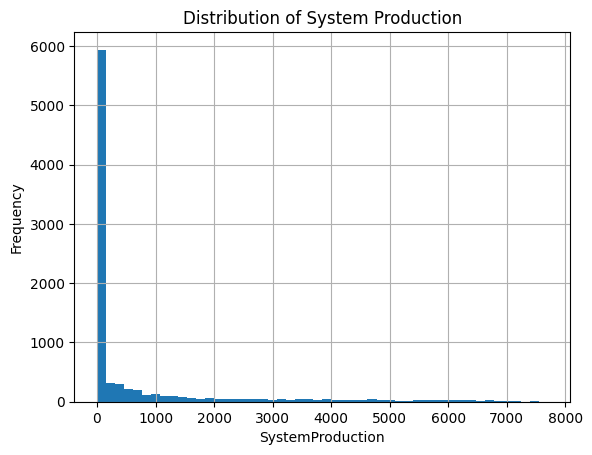

In [10]:
import matplotlib.pyplot as plt

plt.figure()
df['SystemProduction'].hist(bins=50)
plt.xlabel("SystemProduction")
plt.ylabel("Frequency")
plt.title("Distribution of System Production")
plt.show()


## 11. Analisis Hubungan Fitur vs Target
**Tujuan**
- Menjawab: “Apakah fitur ini benar-benar berpengaruh?”

In [12]:
df.corr()['SystemProduction'].sort_values(ascending=False)


SystemProduction       1.000000
Radiation              0.785717
Sunshine               0.564228
AirTemperature         0.480407
WindSpeed              0.195650
AirPressure           -0.004487
RelativeAirHumidity   -0.545252
Name: SystemProduction, dtype: float64

## 12. Analisis Time Pattern (Sanity Check)
**Tujuan**
- Memastikan pola produksi masuk akal

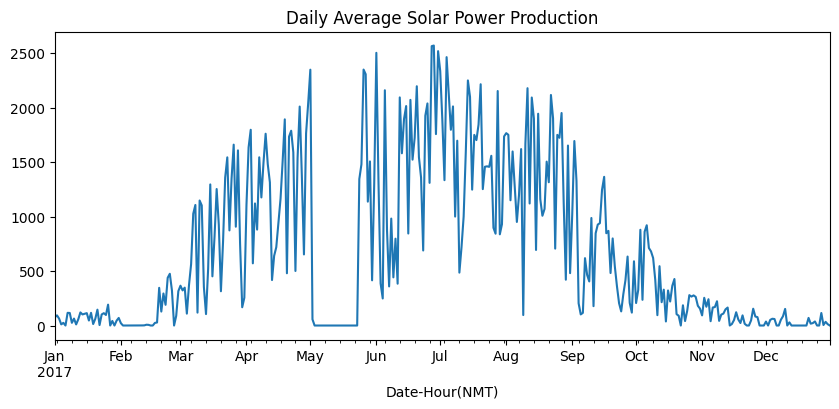

In [13]:
df['SystemProduction'].resample('D').mean().plot(figsize=(10,4))
plt.title("Daily Average Solar Power Production")
plt.show()
